In [3]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import datetime

def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price

# User input
ticker = input('Enter a ticker symbol: ')
expiration = datetime.date(2023, 4, 28) # yyyy, mm, dd
strike_price = float(input('Enter a strike price: '))

# Stock data
stock = yf.Ticker(ticker)
S = stock.history(period='1d')['Close'][0] # current stock price
market_returns = yf.Ticker('^GSPC').history(period='max', interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) # expected return (annualized)
sigma = stock.history(period='1y').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
today = datetime.date.today()
T = (expiration - today).days / 365

# Calculate the call price using the Black-Scholes model
call_price = call_price(S, strike_price, r, sigma, T)

print(f'Call price for {ticker} with a strike price of {strike_price} and expiration date of {expiration} is: {call_price:.2f}')

Enter a ticker symbol: F
Enter a strike price: 12
Call price for F with a strike price of 12.0 and expiration date of 2023-04-28 is: 0.71


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm
import datetime
%matplotlib nbagg

# Define the Black-Scholes model functions
def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price

# Request user input for option parameters
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

# Set up start and end dates for market returns and volatility calculation
today = datetime.date.today()
one_yr_ago = today - datetime.timedelta(days=365)

# Stock history
stock = yf.Ticker(stock_ticker)
market_returns = yf.Ticker(stock_ticker).history(start=one_yr_ago, end=today, interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) * 12 # expected return (annualized)
sigma = stock.history(start=one_yr_ago, end=today, interval='1d').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
expiration = datetime.datetime.strptime(expiration_date, "%Y-%m-%d").date()
T = (expiration - today).days / 365

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
option_payoffs = [call_price(S, strike_price, r, sigma, T) for S in stock_prices]

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([int(current_price*0.5), int(current_price*1.5)])
ax.set_ylim([-10, max(df['Option Payoff'])*1.1])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date})')

# Create the line object
line, = ax.plot([], [])

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100, blit=True)

# Show the plot
plt.style.use('_mpl-gallery')
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm
import datetime
%matplotlib nbagg

# Define the Black-Scholes model functions
def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price

# Request user input for option parameters
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

# Set up start and end dates for market returns and volatility calculation
today = datetime.date.today()
one_yr_ago = today - datetime.timedelta(days=365)

# Stock history
stock = yf.Ticker(stock_ticker)
market_returns = yf.Ticker(stock_ticker).history(start=one_yr_ago, end=today, interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) * 12 # expected return (annualized)
sigma = stock.history(start=one_yr_ago, end=today, interval='1d').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
expiration = datetime.datetime.strptime(expiration_date, "%Y-%m-%d").date()
T = (expiration - today).days / 365

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
option_payoffs = [call_price(S, strike_price, r, sigma, T) for S in stock_prices]

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([int(current_price*0.5), int(current_price*1.5)])
ax.set_ylim([-10, max(df['Option Payoff'])*1.1])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date})')

# Create the line object
line, = ax.plot([], [])

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100, blit=True)

# Show the plot
plt.style.use('_mpl-gallery')
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm
import datetime
%matplotlib nbagg

# Define the Black-Scholes model functions
def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price

# Request user input for option parameters
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

# Set up start and end dates for market returns and volatility calculation
today = datetime.date.today()
one_yr_ago = today - datetime.timedelta(days=365)

# Stock history
stock = yf.Ticker(stock_ticker)
market_returns = yf.Ticker(stock_ticker).history(start=one_yr_ago, end=today, interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) * 12 # expected return (annualized)
sigma = stock.history(start=one_yr_ago, end=today, interval='1d').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
expiration = datetime.datetime.strptime(expiration_date, "%Y-%m-%d").date()
T = (expiration - today).days / 365

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
option_payoffs = [call_price(S, strike_price, r, sigma, T) for S in stock_prices]

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([int(current_price*0.5), int(current_price*1.5)])
ax.set_ylim([-10, max(df['Option Payoff'])*1.1])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date})')

# Create the line object
line, = ax.plot([], [])

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100, blit=True)

# Show the plot
plt.style.use('_mpl-gallery')
plt.show()

Enter the expiration date (YYYY-MM-DD): 2023-04-28
Enter the stock ticker: F
Enter the strike price: 11


<IPython.core.display.Javascript object>


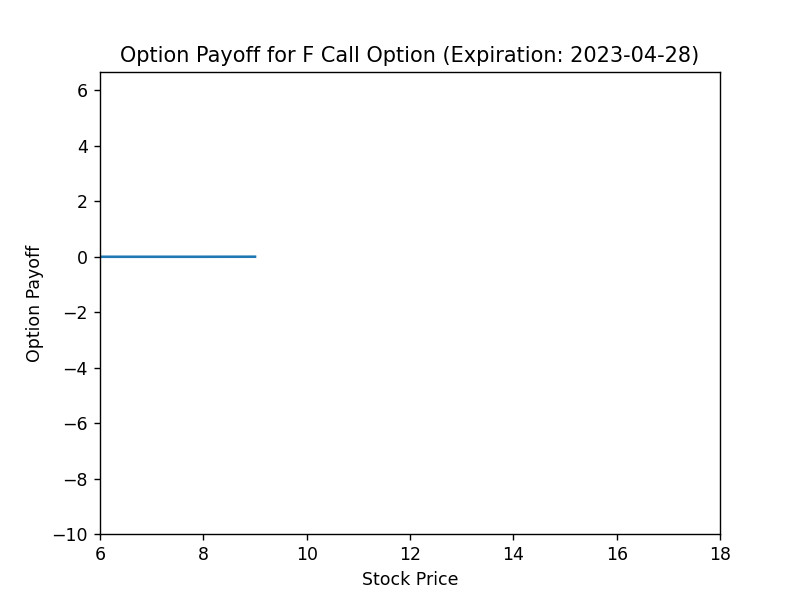

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm
import datetime
import numpy as np
%matplotlib nbagg

# Define the Black-Scholes model functions
def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price

# Request user input for option parameters
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

# Set up start and end dates for market returns and volatility calculation
today = datetime.date.today()
one_yr_ago = today - datetime.timedelta(days=365)

# Stock history
stock = yf.Ticker(stock_ticker)
market_returns = yf.Ticker(stock_ticker).history(start=one_yr_ago, end=today, interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) * 12 # expected return (annualized)
sigma = stock.history(start=one_yr_ago, end=today, interval='1d').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
expiration = datetime.datetime.strptime(expiration_date, "%Y-%m-%d").date()
T = (expiration - today).days / 365

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
option_payoffs = [call_price(S, strike_price, r, sigma, T) for S in stock_prices]

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([int(current_price*0.5), int(current_price*1.5)])
ax.set_ylim([-10, max(df['Option Payoff'])*1.1])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date})')

# Create the line object
line, = ax.plot([], [])

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100, blit=True)

# Show the plot
plt.style.use('_mpl-gallery')
plt.show()